<a href="https://colab.research.google.com/github/strangelycutlemon/DS-Unit-2-Regression-Classification/blob/master/module2/assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [X] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [X] After you remove outliers, what is the mean price in your subset of the data?
- [X] Choose a feature, and plot its relationship with the target.
- [X] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [X] Define a function to make new predictions and explain the model coefficient.
- [X] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [5]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
import pandas_profiling

In [9]:
dir(pandas_profiling)

['Path',
 'ProfileReport',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__init__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_column_names',
 'config',
 'controller',
 'describe_df',
 'display_notebook_iframe',
 'get_config_default',
 'get_project_root',
 'model',
 'np',
 'pandas_decorator',
 'pd',
 'rename_index',
 'sys',
 'templates',
 'to_html',
 'utils',
 'version',
 'view',
 'warnings']

In [0]:
# pandas_profiling.ProfileReport(df)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = '{:,.0f}'.format

df.price.describe()

count      49,352
mean        3,830
std        22,067
min            43
25%         2,500
50%         3,150
75%         4,100
max     4,490,000
Name: price, dtype: float64

In [12]:
df.query('price > 100000')

# All of these are in New York City, NY.
# The most expensive rental in NYC is $500,000 per month.
# So I'll use that as my cutoff.

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
9590,1,2,2016-06-24 05:02:58,NaN,West 116th Street,41,-74,1150000,40 West 116th Street,low,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10581,0,0,2016-04-12 02:11:10,"Originally built in 1862, this extraordinary l...",Duane Street,41,-74,135000,144 Duane Street,low,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19558,1,2,2016-06-24 05:02:11,NaN,Hudson Street,41,-74,4490000,421 Hudson Street,low,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
25538,1,0,2016-06-07 17:35:10,The BEST DEAL!!!!!\r\rBeautiful Studio in a ni...,Van Horn St and 57th ave,41,-74,111111,57-25 Van Horn St,high,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
29665,1,1,2016-05-14 05:21:28,,West 57th Street,41,-74,1070000,333 West 57th Street,low,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30689,1,1,2016-05-19 02:37:06,This 1 Bedroom apartment is located on a prime...,West 57th Street,41,-74,1070000,333 West 57th Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df = df.query('price < 500000')

In [14]:
df.describe()
# mean price is now $3,673

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,"49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348","49,348"
mean,1,2,41,-74,"3,673",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
std,1,1,1,1,"2,535",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
min,0,0,0,-118,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,1,1,41,-74,"2,500",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,1,1,41,-74,"3,150",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75%,1,2,41,-74,"4,100",1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
max,10,8,45,0,"135,000",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [15]:
df.longitude.dtypes, df.latitude.dtypes

(dtype('float64'), dtype('float64'))

## I hit too many problems with Basemap to use it for looking for geospatial outliers (e.g. in the ocean).
I may come back to it later, but I'm gonna go for MVP right now.

In [0]:
# from mpl_toolkits.basemap import Basemap

In [0]:
# plt.figure(figsize=(8,8))
# m = Basemap(projection='lcc', resolution=None,
#             width=8E6, height=8E6,
#             lat_0=0, lon_0=0)
# m.etopo(scale=0.5, alpha=0.5)
# for i in df:
#   x, y = m(df.latitude, df.longitude)
#   plt.plot(x, y, 'ok', markersize=1)

In [18]:
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [19]:
df.isnull().sum() # None of these nulls should be a problem for our regression.

bathrooms                  0
bedrooms                   0
created                    0
description             1444
display_address          135
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
dtype: int64

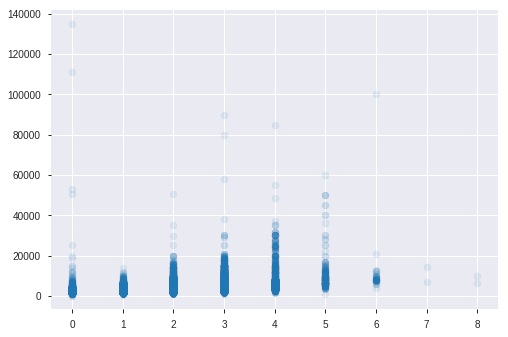

In [20]:
feature = 'bedrooms'

fig = plt.figure()
plt.scatter(df[feature], df['price'], alpha=0.1)

# Price begins to fall past 4. This makes me wonder how consistent the 'price'
# values really are. Is it possible that some of the prices are per-person
# rather than the overall price of renting the property?

# If we disregard that worry, a good explanation may simply be that for
# rentals above a certain price, the number of bedrooms is not a very good 
# predictor of price.

# Nonetheless, we should work with what we have. Though this seems to call for
# polynomial regression, I'll start with linear regression.


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

feature = df[['bedrooms']]
target = df[['price']]

model.fit(feature, target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

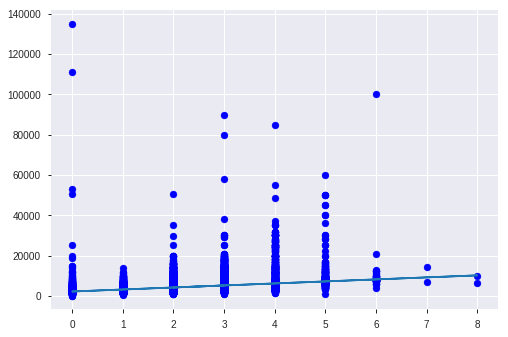

In [22]:
y_pred = model.predict(feature)

plt.scatter(feature, target, color='b')
plt.plot(feature, y_pred)

In [0]:
# Well this is going to have a huge MAE.

# df['Predicted'] = y_pred
# df['Error'] = y_pred - df.price
# abs(df['Error']).mean()

# Trying to calculate MAE crashed my session, so I won't try that again. It wouldn't tell us a whole lot anyway, except exactly how useless this model is.

In [24]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter_3d(df, x='bedrooms', y='bathrooms', z='price', color='interest_level')

fig

In [0]:
def predict_me(bedrooms):
  bedrooms = int(bedrooms)
  print("A property with", bedrooms, "bedrooms has a predicted price of", model.predict([[bedrooms]])[0,0])
  print("Each bedroom increases the price by", model.coef_[0,0])

In [51]:
predict_me(4)

A property with 4 bedrooms has a predicted price of 6135.3171187606295
Each bedroom increases the price by 1001.6805850603765
